# PHASE 4 PROJECT : GROUP 3

# Project Title: Time Series Modelling of Real Estate Value.

# Team Members ;

1.Joan Nyamache

2.Marion Achieng

3.Eugene Marius


# Introduction

Zillow is a real estate company that provides extensive datasets that offer insights into the housing market.The stakeholder in this project is seeking to construct residential homes in the United States that provide a return on investment.
This project aims to construct a time series model leveraging Zillow's dataset to assist real estate investors in making well-informed investment decisions.



# Overview

In this project we aim to do the following:

Loading the dataset.

* Gaining a comprehensive understanding of the dataset.

* Identifying and selecting our target variable.

* Preparing the dataset, which involves tasks such as cleaning, checking for multicollinearity, and ensuring data integrity.

* Encoding categorical variables to make them compatible with our modeling process.

* Evaluating the performance of our models using appropriate metrics.

* Utilizing our trained models for making predictions.

* Drawing meaningful insights and conclusions based on our findings.

# Business understanding

The world of real estate investing is a dynamic and lucrative field, requiring careful research and well-planned choices. A fictional company specializing in real estate investments is seeking valuable information to identify the five most promising postal codes (zip codes) for future ventures. To achieve this goal, we'll utilize historical data provided by Zillow Research.

# Problem Statement

The driving force behind this project is a real estate development company in the United States. Their primary objective is to construct residential properties that offer a significant financial return.

To achieve this goal, we'll be conducting a time series analysis on historical housing data from Zillow. This data encompasses various locations across the country. By analyzing these trends, we aim to pinpoint the most promising areas for investment, allowing the company to build homes with high profit potential.

# Objectives

1. Identify the top 5 zip codes for the real estate agency to invest in.

2. Forecast future house prices in these zip codes.

3. Provide insights and recommendations


# Data Understanding

The dataset used in this project comprises historical median house prices from various states in the USA, spanning from April 1996 to April 2018 (22 years). This data was obtained from the Zillow website.

The dataset contains 14,723 rows and 272 columns, with 4 categorical columns and 268 numerical columns.
The dataset encompasses details on a range of attributes, including RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and the value representing real estate prices

Data Preparation

Lets import the reevent libraries ;

In [1]:
#Importing the data libraries
import numpy as np
import pandas as pd
import itertools
import warnings
warnings.filterwarnings('ignore')

#importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing modeling libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [2]:
#preview the first 5 columns of the data set
data = pd.read_csv('zillow_data.csv')
df = data.copy()
df.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# preview the last five columns of the dataset
df.tail() 


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [4]:
#view the column names
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [5]:
# Lets rename the regionmane to zipcode because it contains the zipcode data
df = df.rename(columns={'RegionName': 'Zipcode'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [8]:
df.describe

<bound method NDFrame.describe of        RegionID  Zipcode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO                NaN   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0  

In [28]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
#checking for missing values
df.isna().sum()

RegionID       0
Zipcode        0
City           0
State          0
Metro       1043
            ... 
2017-12        0
2018-01        0
2018-02        0
2018-03        0
2018-04        0
Length: 272, dtype: int64

In [10]:
# Remove rows with missing values (NaN) 
df.dropna(inplace = True)


In [31]:
# Drop rows where 'Metro' is still null
df_cleaned = df.dropna(subset=['Metro'])

# Display the cleaned DataFrame to verify
print(df_cleaned)

       RegionID Zipcode         City State      Metro CountyName  SizeRank  \
117       62022   11211     New York    NY   New York      Kings       118   
1155      62033   11222     New York    NY   New York      Kings      1156   
475       62027   11216     New York    NY   New York      Kings       476   
191       60639    7302  Jersey City    NJ   New York     Hudson       192   
106       62026   11215     New York    NY   New York      Kings       107   
...         ...     ...          ...   ...        ...        ...       ...   
13845     84758   61012       Capron    IL   Rockford      Boone     13846   
7402      64354   15902    Johnstown    PA  Johnstown    Cambria      7403   
5068      92646   78735       Austin    TX     Austin     Travis      5069   
4381      79244   48503        Flint    MI      Flint    Genesee      4382   
4149      79247   48506        Flint    MI      Flint    Genesee      4150   

        1996-04   1996-05   1996-06  ...  2017-10  2017-11  201

In [32]:
df.isna().sum()

RegionID          0
Zipcode           0
City              0
State             0
Metro             0
                 ..
2018-03           0
2018-04           0
Cumulative_ROI    0
Average_ROI       0
Annualized_ROI    0
Length: 275, dtype: int64

Lets add a column on Return on investment (ROI)

In [33]:
#filter Zipcode
# Recalculate the number of years between the earliest and latest date
years_difference = (2018 - 1996) + (4/12)

# Calculate the Annualized ROI for each RegionName
df['Annualized_ROI'] = ((df['2018-04'] / df['1996-04'])**(1/years_difference) - 1) * 100
#annualized_roi_df = df[['RegionName', 'City', 'State', 'Annualized_ROI']]

# Sort the DataFrame based on Annualized_ROI in descending order
sorted_annualized_roi_df = df.sort_values(by='Annualized_ROI', ascending=False)

#Reveal the top 5 Regional names in terms of zipcode
sorted_annualized_roi_df.head(5)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Cumulative_ROI,Average_ROI,Annualized_ROI
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1435300,1440500,1463100,1496100,1531100,1581900,1623700,157586100.0,7.163005e+06,11.847669
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1640400,1644100,1651200,1661800,1672800,1694000,1721100,169463400.0,7.702882e+06,11.571663
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1567700,1559700,1545700,1540200,1553600,1578400,1598700,151479400.0,6.885427e+06,11.308317
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1435900,1446300,1447800,1454900,1453900,1439500,1427300,157959500.0,7.179977e+06,11.056640
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2266100,2275800,2287100,2288900,2265300,2244900,2243900,284639300.0,1.293815e+07,10.831426


# Data Preprocessing

In [35]:
df=sorted_annualized_roi_df
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    date_columns = []
    for col in df.columns[1:]:  # Skip the first column assuming it's 'RegionName'
        try:
            pd.to_datetime(col, format='%Y-%m')
            date_columns.append(col)
        except ValueError:
            continue
    return date_columns

In [36]:
# Identify columns that can be converted to datetime
date_columns = get_datetimes(df)
print("Date Columns:", date_columns)

Date Columns: ['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-

In [37]:
print("Number of Date Columns:", len(date_columns))

Number of Date Columns: 265


In [38]:
# Convert wide format to long format
df_long = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank','Annualized_ROI'],
                  var_name='Date', value_name='Price')

# Display the first few rows of the long format dataframe
df_long.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Annualized_ROI,Date,Price
0,62022,11211,New York,NY,New York,Kings,118,11.847669,1996-04,133200.0
1,62033,11222,New York,NY,New York,Kings,1156,11.571663,1996-04,149200.0
2,62027,11216,New York,NY,New York,Kings,476,11.308317,1996-04,146100.0
3,60639,7302,Jersey City,NJ,New York,Hudson,192,11.056640,1996-04,137200.0
4,62026,11215,New York,NY,New York,Kings,107,10.831426,1996-04,225700.0


In [39]:
df_long.shape

(3442965, 10)

In [40]:
# Check for any missing values on the long format
df_long.isnull().sum()

RegionID          0
Zipcode           0
City              0
State             0
Metro             0
CountyName        0
SizeRank          0
Annualized_ROI    0
Date              0
Price             0
dtype: int64

In [41]:
# Set the date column as the index
df_long.set_index('Date', inplace=True)

Lets create a boxplot to visually inspect and identify potential outliers in dataset

In [57]:
#Checking for outliers
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
        
# Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

#Call the function
columns_to_check = df.select_dtypes(include = ['number'])
check_outliers(df, columns_to_check)

RegionID
Number of outliers: 101

SizeRank
Number of outliers: 0

1996-04
Number of outliers: 655

1996-05
Number of outliers: 655

1996-06
Number of outliers: 658

1996-07
Number of outliers: 661

1996-08
Number of outliers: 664

1996-09
Number of outliers: 665

1996-10
Number of outliers: 669

1996-11
Number of outliers: 669

1996-12
Number of outliers: 666

1997-01
Number of outliers: 667

1997-02
Number of outliers: 672

1997-03
Number of outliers: 676

1997-04
Number of outliers: 688

1997-05
Number of outliers: 686

1997-06
Number of outliers: 689

1997-07
Number of outliers: 691

1997-08
Number of outliers: 687

1997-09
Number of outliers: 690

1997-10
Number of outliers: 699

1997-11
Number of outliers: 719

1997-12
Number of outliers: 723

1998-01
Number of outliers: 726

1998-02
Number of outliers: 726

1998-03
Number of outliers: 732

1998-04
Number of outliers: 737

1998-05
Number of outliers: 738

1998-06
Number of outliers: 739

1998-07
Number of outliers: 742

1998-08
Nu

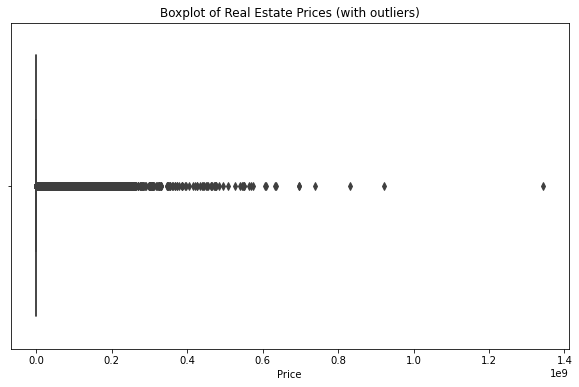

In [63]:
# Plotting the boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_long['Price'])
plt.title('Boxplot of Real Estate Prices (with outliers)')
plt.xlabel('Price')
plt.show()

Based on the presence of whiskers in the box plot, we can confirm that there are outliers in the data set. While the outliers might not be extremely far from the rest of the data, their existence indicates that some real estate prices deviate considerably from the middle 50% range.

The whiskers in the box plot extend beyond the box, indicating the presence of data points outside the interquartile range.

The boxplots indicates there are outliers present but we cant drop them because they are actual events recorded

The next step is to investigate Outliers to Identify and investigate these outliers to understand the characteristics of these high-priced properties. Determine if they should be included or excluded from further analysis based on their impact on the results.

In [64]:
#Checking for Outliers using IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_long['Price'].quantile(0.25)
Q3 = df_long['Price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier cutoff
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_long[(df_long['Price'] < lower_bound) | (df_long['Price'] > upper_bound)]

# Print the number of outliers and some examples
print(f"Number of outliers: {len(outliers)}")
outliers.head()

Number of outliers: 274849


,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Annualized_ROI,Price
Date,,,,,,,,,
1996-04,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,8.956091,709500.0
1996-04,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,8.408513,480200.0
1996-04,97571,94117,San Francisco,CA,San Francisco,San Francisco,897,8.346852,481000.0
1996-04,96050,90069,West Hollywood,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1897,8.283683,533600.0
1996-04,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,8.244182,1015400.0


# Exprolatory Data Analysis

Univariate Analysis